# Importing all necessay packages 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow import keras

from keras.preprocessing.image import ImageDataGenerator

# Importing MNIST data

In [4]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

# Splitting and reshaping train data 

In [5]:
y_train = train["label"]
x_train = train.drop(labels = ['label'], axis = 1)
x_train = x_train.values.reshape(-1, 28, 28, 1) 
test = test.values.reshape(-1,28,28,1)

# Plot the first digit of the data 

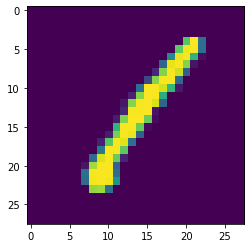

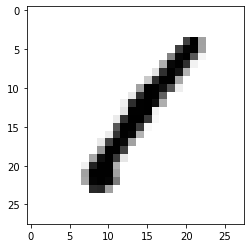

In [6]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap = plt.cm.binary)

# Normalize the data to make CNN faster 

In [7]:
x_train = x_train/255
test = test/255

# CNN model

In [69]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = x_train.shape[1:])) #convolutional layer 
model.add(Activation("relu")) #activation relu
model.add(BatchNormalization()) #batch normalizing 
model.add(MaxPooling2D(pool_size = (2,2))) #maxpooling
model.add(Dropout(0.25)) #dropout

model.add(Conv2D(64, (3,3))) #convolutional layer 
model.add(Activation("relu")) #activation relu
model.add(BatchNormalization()) #batch normalizing 
model.add(MaxPooling2D(pool_size = (2,2))) #maxpooling
model.add(Dropout(0.25)) #dropout


model.add(Conv2D(256, (3,3))) #convolutional layer 
model.add(Activation("relu")) #activation relu
model.add(BatchNormalization()) #batch normalizing 
model.add(MaxPooling2D(pool_size = (2,2))) #maxpooling
model.add(Dropout(0.25)) #dropout


model.add(Flatten()) #flattening


model.add(Dense(64)) #Dense layer
model.add(Activation("relu")) #activation relu

model.add(Dense(10)) #Dense layer with 10 neurons
model.add(Activation("softmax")) #activation softmax 


model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])


In [70]:
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
1313/1313 [==============================] - 56s 42ms/step - loss: 0.2198 - accuracy: 0.9326
Epoch 2/50
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0933 - accuracy: 0.9715
Epoch 3/50
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0733 - accuracy: 0.9774
Epoch 4/50
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0633 - accuracy: 0.9801
Epoch 5/50
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0564 - accuracy: 0.9823
Epoch 6/50
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0530 - accuracy: 0.9818
Epoch 7/50
1313/1313 [==============================] - 54s 41ms/step - loss: 0.0440 - accuracy: 0.9858
Epoch 8/50
1313/1313 [==============================] - 54s 41ms/step - loss: 0.0423 - accuracy: 0.9864
Epoch 9/50
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0383 - accuracy: 0.9876
Epoch 10/50
1313/1313 [==============================] - 54s 41m

In [71]:
predictions = model.predict(test)
predictions = np.argmax(predictions, axis = 1)
predictions = pd.Series(predictions, name = "Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"), predictions],axis = 1)
submission.to_csv("cnn_mnist_data", index = False)